In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
class Image:
    #------------------------------------------------------
    def __init__(self, path_to_image: str) -> None:
        """
        Initialize the Image object with the image located at the given path.

        Parameters:
            path_to_image (str): The path to the image file.
        """
        self.image = cv2.imread(path_to_image)
    #------------------------------------------------------
    def show_img(self) -> None:
        """
        Display the image.
        """
        plt.imshow(self.image)
        plt.axis('off')
        plt.show()
    #------------------------------------------------------
    def save_img(self, name: str, path: str = '') -> None:
        """
        Save the image with the given name and path.

        Parameters:
            name (str): The name of the image file.
            path (str, optional): The path to save the image. Defaults to the current directory.
        """
        file_path = os.path.join(path, name + '.jpg')
        plt.imsave(file_path, self.image)
        print(f"Image saved at: {file_path}")
    #------------------------------------------------------
    def make_gray(self) -> None:
        """
        Convert the image to grayscale.
        """
        blue_channel = self.image[:, :, 0]
        green_channel = self.image[:, :, 1]
        red_channel = self.image[:, :, 2]

        gray_values = 0.114 * blue_channel + 0.587 * green_channel + 0.299 * red_channel

        gray_image = np.stack((gray_values, gray_values, gray_values), axis=-1)

        self.image = gray_image.astype(np.uint8)
    #------------------------------------------------------
    def invert_color(self) -> None:
        """
        Invert the colors of the image.
        """
        inverted_image = 255 - self.image
        self.image = inverted_image
    #------------------------------------------------------
    def adjust_brightness(self, factor: float) -> None:
        """
        Adjust the brightness of the image by a given factor.

        Parameters:
            factor (float): The brightness adjustment factor.
        """
        image_float = self.image.astype(np.float32)
        adjusted_image = image_float * factor
        adjusted_image = np.clip(adjusted_image, 0, 255)

        self.image = adjusted_image.astype(np.uint8)
    #------------------------------------------------------
    def rotate_image(self, degree: float, direction: str = 'counterclockwise') -> None:
        """
        Rotate the image by the given degree in the specified direction.

        Parameters:
            degree (float): The degree of rotation.
            direction (str, optional): The direction of rotation. Defaults to 'counterclockwise'.
                Can be either 'counterclockwise' or 'clockwise'.
        """
        angle_radians = np.radians(degree)
        height, width = self.image.shape[:2]
        center_x = width // 2
        center_y = height // 2
        cos_theta = np.cos(angle_radians)
        sin_theta = np.sin(angle_radians)
        rotation_matrix = np.array([[cos_theta, -sin_theta, (1 - cos_theta) * center_x + sin_theta * center_y],
                                    [sin_theta, cos_theta, (1 - cos_theta) * center_y - sin_theta * center_x]])

        if direction == 'counterclockwise':
            rotation_matrix = cv2.invertAffineTransform(rotation_matrix)

        rotated_image = cv2.warpAffine(self.image, rotation_matrix, (width, height))
        self.image = rotated_image
    #------------------------------------------------------
    def resize_image(self, scale_factor: float) -> None:
        """
        Resize the image by the given scale factor.

        Parameters:
            scale_factor (float): The scale factor for resizing.
        """
        height, width = self.image.shape[:2]
        new_height = int(height * scale_factor)
        new_width = int(width * scale_factor)
        scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]])
        resized_image = cv2.warpAffine(self.image, scaling_matrix, (new_width, new_height))
        self.image = resized_image
    #------------------------------------------------------
    def mirror_image(self, axis: str = 'horizontal') -> None:
        """
        Mirror the image along the specified axis.

        Parameters:
            axis (str, optional): The axis along which to perform the mirroring.
                Defaults to 'horizontal'. Can be either 'horizontal' or 'vertical'.
        """
        height, width = self.image.shape[:2]

        if axis == 'horizontal':
            reflection_matrix = np.array([[-1, 0, width - 1], [0, 1, 0]], dtype=np.float32)
        elif axis == 'vertical':
            reflection_matrix = np.array([[1, 0, 0], [0, -1, height - 1]], dtype=np.float32)
        else:
            raise ValueError("Invalid mirror axis. Pleasechoose 'horizontal' or 'vertical'.")

        mirrored_image = cv2.warpAffine(self.image, reflection_matrix, (width, height))
        self.image = mirrored_image
    #------------------------------------------------------
    def edge_detection(self) -> None:
        """
        Perform edge detection on the image using matrix functions.
        """
        kernel_x = np.array([[-1, 0, 1],
                             [-2, 0, 2],
                             [-1, 0, 1]])

        kernel_y = np.array([[-1, -2, -1],
                             [0, 0, 0],
                             [1, 2, 1]])

        gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)

        edges_x = np.abs(cv2.filter2D(gray_image, -1, kernel_x))
        edges_y = np.abs(cv2.filter2D(gray_image, -1, kernel_y))

        edge_image = np.clip(edges_x + edges_y, 0, 255).astype(np.uint8)

        self.image = edge_image
    #------------------------------------------------------
    def built_in_edge_detection(self, threshold1: float, threshold2: float) -> None:
        """
        Perform edge detection on the image using the Canny edge detection algorithm.

        Parameters:
            threshold1 (float): The lower threshold for the hysteresis procedure.
            threshold2 (float): The upper threshold for the hysteresis procedure.
        """
        if len(self.image.shape) > 2 and self.image.shape[2] > 1:
            gray_image = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        else:
            gray_image = self.image.copy()

        edges = cv2.Canny(gray_image, threshold1, threshold2)

        color_edges = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

        self.image = color_edges
    #------------------------------------------------------
    def apply_blur_filter(self):
        """
        Apply a blur filter to the image using a 5x5 kernel.

        The blur filter helps to reduce noise and smooth out the image.

        The function uses a kernel with all elements set to 1 divided by 25 (5x5 kernel size).
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_blur_filter()
        """
        kernel = np.ones((5, 5), dtype=np.float32) / 25
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def apply_sharpen_filter(self):
        """
        Apply a sharpen filter to the image.

        The sharpen filter enhances the edges and details in the image.

        The function uses a specific 3x3 kernel for sharpening.
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_sharpen_filter()
        """
        kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def apply_emboss_filter(self):
        """
        Apply an emboss filter to the image.

        The emboss filter creates a 3D effect by emphasizing the differences in pixel intensities.

        The function uses a specific 3x3 kernel for embossing.
        The filter is applied using the cv2.filter2D function.

        Example:
            image.apply_emboss_filter()
        """
        kernel = np.array([[0, -1, -1], [1, 0, -1], [1, 1, 0]], dtype=np.float32)
        self.image = cv2.filter2D(self.image, -1, kernel)
    #------------------------------------------------------
    def compute_histogram(self):
        """
        Compute and display the histogram of the image.

        The histogram represents the frequency distribution of pixel intensities in the image.

        The function uses the cv2.calcHist function to calculate the histogram.
        The histogram is flattened for plotting using the hist.flatten() method.
        The histogram is then plotted using matplotlib.pyplot.

        Example:
            image.compute_histogram()
        """
        hist = cv2.calcHist([self.image], [0], None, [256], [0, 256])
        hist = hist.flatten()  # Flatten the histogram array

        plt.figure()
        plt.title("Histogram")
        plt.xlabel("Pixel Intensity")
        plt.ylabel("Frequency")
        plt.plot(hist)
        plt.show()
    #------------------------------------------------------

<h1><center>Testing The Code</center></h1>

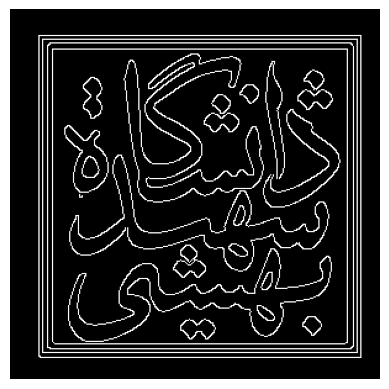

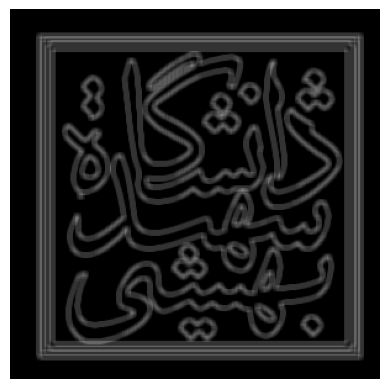

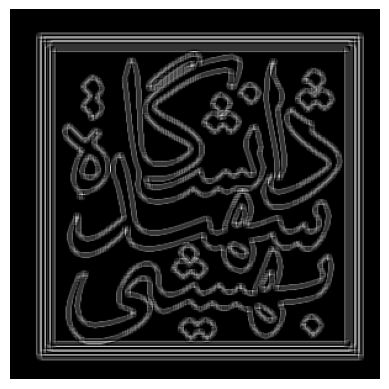

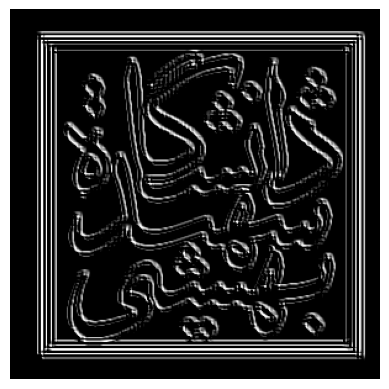

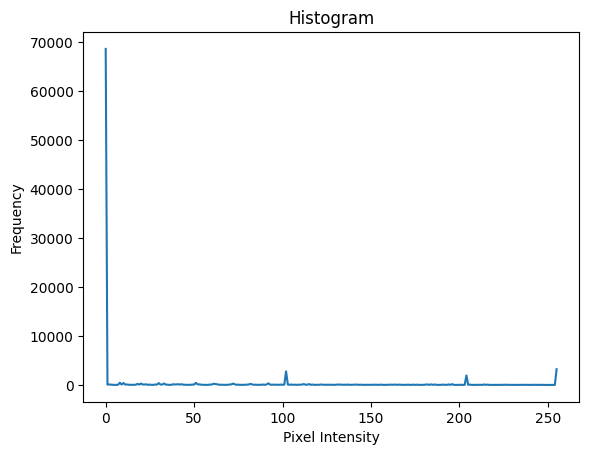

In [6]:
image = Image('img.jpg')
image.built_in_edge_detection(20, 50)
image.show_img()
# Apply the blur filter
image.apply_blur_filter()
image.show_img()
# Apply the sharpen filter
image.apply_sharpen_filter()
image.show_img()
# Apply the emboss filter
image.apply_emboss_filter()
image.show_img()

# Compute and plot the histogram
image.compute_histogram()